In [1]:
print("hello world")

hello world


In [1]:
print("hello world")

hello world


In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('geolocation.csv' , 'geolocation'),
    ('orders.csv', 'orders'),
    ('order_items.csv', 'order_items'),
    ('products.csv', 'products'),
    ('sellers.csv', 'sellers'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='Localhost',
    user='root',
    password='pass123',
    database='project'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/pawan/python/projects/dataset for projects(ecom)'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing geolocation.csv
NaN values before replacement:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length   

In [7]:
pip install mysql-connector-python


   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/14.3 MB 6.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/14.3 MB 4.6 MB/s eta 0:00:03
   -------- ------------------------------- 2.9/14.3 MB 4.3 MB/s eta 0:00:03
   ---------- ----------------------------- 3.7/14.3 MB 4.2 MB/s eta 0:00:03
   ------------ --------------------------- 4.5/14.3 MB 4.1 MB/s eta 0:00:03
   -------------- ------------------------- 5.2/14.3 MB 4.0 MB/s eta 0:00:03
   ---------------- ----------------------- 6.0/14.3 MB 4.1 MB/s eta 0:00:03
   ------------------- -------------------- 6.8/14.3 MB 4.0 MB/s eta 0:00:02
   --------------------- ------------------ 7.6/14.3 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 8.4/14.3 MB 4.0 MB/s eta 0:00:02
   ------------------------- -------------- 9.2/14.3 MB 4.0 MB/s eta 0:00:02
   --------------------------- ------------ 10.0/14.3 MB 4.0 MB/s eta 0:00:02
   --

In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 
import numpy as np

db = mysql.connector.connect(
                         host = "Localhost",
                        user = "root",
                        password = "pass123",
                        database = "project")

cur = db.cursor()

# 1 . List all unique cities where customers are located.

In [6]:
query = """ SELECT DISTINCT CUSTOMER_CITY FROM CUSTOMERS """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head(10)

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo
7,curitiba
8,belo horizonte
9,montes claros


# 2. Count the number of orders placed in 2017.

In [8]:
query = """SELECT COUNT(order_id ) FROM orders
WHERE year(order_purchase_timestamp) = 2017 """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0
0,45101


# 3. Find the total sales per category.

In [17]:
query = """ select pd.product_category,round(sum(payment_value)) , Count(Ot.order_id)  from products as pd
             join order_items as Ot On pd.product_id = Ot.product_id
             join payments as py On Ot.order_id = py.order_id
             group by pd.product_category 
             order by pd.product_category
              """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["category","sales","order_id"])
df


,category,sales,order_id
0,None,252802.0,1698
1,Agro Industria e Comercio,118731.0,252
2,Art,30993.0,219
3,Arts and Crafts,2326.0,24
4,audio,60325.0,380
...,...,...,...
69,stationary store,317440.0,2617
70,technical books,24915.0,270
71,telephony,486882.0,4721
72,toys,619038.0,4273


# 4.Calculate the percentage of orders that were paid in installments.

In [15]:
query = """ select ((select count(payment_installments) from payments where payment_installments >= 1)/(Count(payment_installments))*100)
from payments """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0
0,99.9981


# 5. Count the number of customers from each state. 

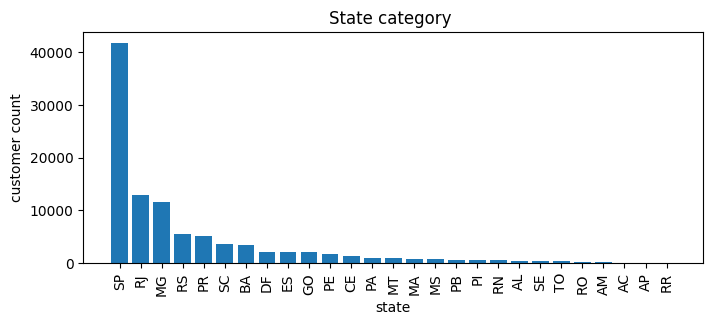

In [30]:
query = """ select count(customer_id ), customer_state from customers
 group by customer_state 
 order by customer_state"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer_count","State"])
df = df.sort_values(by = "customer_count", ascending = False ) 
plt.figure(figsize=(8,3))
plt.bar(df["State"], df["customer_count"])

plt.xticks(rotation = 90)
plt.xlabel("state")
plt.ylabel("customer count")
plt.title("State category ")

plt.show()

# 6 .Calculate the number of orders per month in 2018.

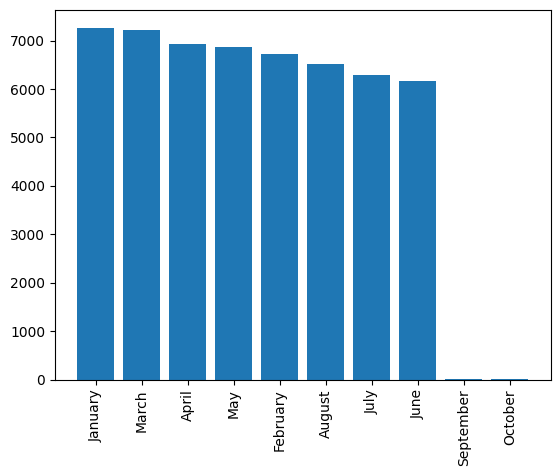

In [36]:
query = """ SELECT monthname(order_purchase_timestamp),count(order_id)  FROM ORDERS
            WHERE YEAR(order_purchase_timestamp) = 2018
            group by monthname(order_purchase_timestamp)
            order by count(order_id) DESC """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["month","orders"])
df
plt.bar(df["month"],df["orders"])
plt.xticks(rotation = 90)
plt.show()

# 7.  Find the average number of products per order, grouped by customer city.

In [53]:
query = """ with Count_per_order as (SELECT Od.order_id,Od.customer_id,count(ot.order_id) as Oc FROM order_items as Ot
join orders as Od On Ot.order_id = Od.order_id 
group by Od.order_id,Od.customer_id )

Select Cu.customer_city , round(avg(Cp.Oc),2) as CN from customers as Cu
join Count_per_order as CP ON  CP.customer_id = Cu.customer_id
group by Cu.customer_city
order by CN DESC
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data,columns = ["City","products"] )
df 

,City,products
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
...,...,...
4105,sebastiao leal,1.00
4106,morro agudo de goias,1.00
4107,santa filomena,1.00
4108,guamiranga,1.00


# 8.Calculate the percentage of total revenue contributed by each product category.

In [61]:
 query = """ select pd.product_category, 
 round(((sum(payment_value))/(select sum(payment_value) from payments ))*100) as per_product ,
 round(sum(payment_value)) as per_product_value,
 Count(Ot.order_id)  from products as pd
             join order_items as Ot On pd.product_id = Ot.product_id
             join payments as py On Ot.order_id = py.order_id
             group by pd.product_category 
             order by per_product DESC   """
    
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data , columns = ["product_category","percent","valuation","order_count"])
df

,product_category,percent,valuation,order_count
0,bed table bath,11.0,1712554.0,11823
1,computer accessories,10.0,1585330.0,8082
2,HEALTH BEAUTY,10.0,1657373.0,9972
3,Furniture Decoration,9.0,1430176.0,8744
4,Watches present,9.0,1429217.0,6201
...,...,...,...,...
69,cds music dvds,0.0,1199.0,14
70,La Cuisine,0.0,2914.0,16
71,Fashion Children's Clothing,0.0,786.0,8
72,PC Gamer,0.0,2174.0,10


# 9.Identify the correlation between product price and the number of times a product has been purchased.

In [76]:
query = """   select pd.product_category, count(ot.product_id), round(avg(ot.price),2) as price from  products as pd 
join order_items as ot on pd.product_id = ot.product_id 
group by pd.product_category
"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data ,columns =["product","order_count","price"])
arr1 = df["order_count"]
arr2 = df["price"]
a = np.corrcoef([arr1,arr2])
print(a[0][-1])

-0.10631514167157562


# 10 Calculate the total revenue generated by each seller, and rank them by revenue.

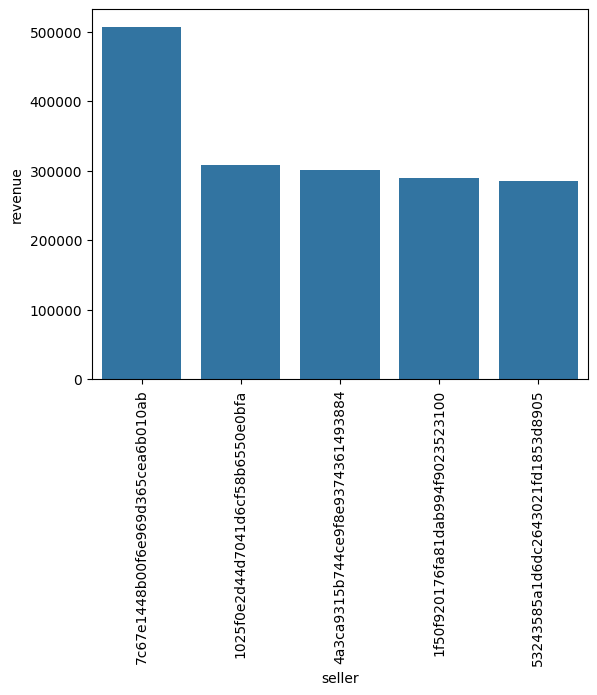

In [84]:
query = """  select * , dense_rank() over(order by revenue desc) from (select se.seller_id, sum(py.payment_value) as revenue from sellers as se 
join order_items as ot on se.seller_id =  ot.seller_id 
join payments as py on ot.order_id = py.order_id 
group by se.seller_id ) as a
"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller" , "revenue", "Rank"])
df = df.head()
sns.barplot(x = "seller", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# 11 Calculate the moving average of order values for each customer over their order history.

In [13]:
query = """ select customer_id , order_purchase_timestamp ,avg(payment) over( partition by customer_id order by order_purchase_timestamp 
rows  between 2 preceding and current row) as mov_avg from 
(select  od.customer_id , od.order_purchase_timestamp , py.payment_value as payment from orders as od
join payments as py 
on py.order_id = od.order_id) as a
"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer_id","Order_purchase_time","Moving_avg"])
df

,Customer_id,Order_purchase_time,Moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001


# 12. Calculate the cumulative sales per month for each year.

In [24]:
query = """ select year , months, sum(payments) over (order by year , months ) as cum_sum  from (select year(od.order_purchase_timestamp) as year ,
month(od.order_purchase_timestamp) as months, 
Round(sum(py.payment_value),2) as payments 
from orders as od 
join payments as py on od.order_id = py.order_id 
group by year,months
order by year,months) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["year","months","revenue"])
df
#plt.bar(df["Year"],df["revenue"])
#plt.xticks(rotation = 90)
#plt.show()

,year,months,revenue
0,2016,9,1008.96
1,2016,10,237370.88
2,2016,12,237449.36
3,2017,1,791401.52
4,2017,2,1959033.56
5,2017,3,3758487.96
6,2017,4,5429640.08
7,2017,5,7801315.36
8,2017,6,9846420.88
9,2017,7,12215952.56


# 13 .Calculate the year-over-year growth rate of total sales.

In [26]:
query = """ with cte as(select year(od.order_purchase_timestamp) as year , 
Round(sum(py.payment_value),2) as payments 
from orders as od 
join payments as py on od.order_id = py.order_id 
group by year
order by year)

select year ,Round((((payments - lag(payments,1) over (order by year))/lag(payments,1) over(order by year))*100),2) as yoy from cte
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["year","yoy%"])
df

,year,yoy%
0,2016,NaN
1,2017,12112.7
2,2018,20.0


# 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [7]:
query = """ 
with a as(select  od.customer_id , min(order_purchase_timestamp) as first_order from orders as od 
group by od.customer_id)
,b as(select a.customer_id , count(distinct os.order_purchase_timestamp) as next_order  from 
orders as os 
join  a on a.customer_id = os.customer_id
and os.order_purchase_timestamp > first_order
and os.order_purchase_timestamp < date_add(first_order , interval 6 month)
group by a.customer_id)

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;
"""

cur.execute(query)
data = cur.fetchall()
data

[(None,)]

# 15.Identify the top 3 customers who spent the most money in each year.

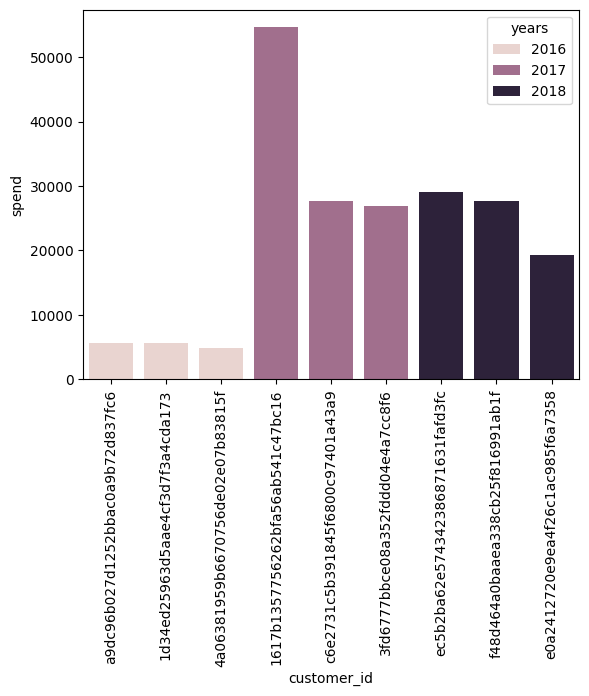

In [19]:
query = """ 

select years ,customer_id , spend , d_rank from
(select year(od.order_purchase_timestamp) as years ,cu.customer_id, 
Round(sum(py.payment_value),2) as spend,
dense_rank() over(partition by year(od.order_purchase_timestamp) order by sum(py.payment_value) desc) as d_rank
from customers as cu 
join orders as od on cu.customer_id = od.customer_id 
join payments as py on py.order_id = od.order_id
group by years,cu.customer_id  ) as a 
where d_rank <= 3;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["years","customer_id","spend","d_rank"])
df
sns.barplot(data = df , x = "customer_id" , y = "spend",hue = "years")
plt.xticks(rotation = 90)
plt.show()